Taylor Series
=============

Suppose you have some function that may be expensive or difficult to evaluate and so you’d like to find an easy approximation for that function in some limited domain. One particularly nice way to handle that is with a polynomial approximation since they are easy to compute. The question is: How can we find such a polynomial? One easy answer is called the "Taylor Series" set up like so:

$$f(x) = A + B(x-x_0) + C(x-x_0)^2 + D(x-x_0)^3 + \cdots$$

So.. $x_0$ is the point around which we are interested in finding an approximation, but what are the values coefficients $A$, $B$, $C$, etc. of the binomials $(x-x_0)^n$ ? There are many ways to answer that question but *Taylor* *Series* answer is that the value of the function, and all of its derivatives *must* *match* the value of the *series* and all of *its* derivatives at the point x0. Let’s try it and see what happens: Just substitute $x \rightarrow x_0$ in the expression.

What happens? Well.. $x_0 - x_0$ is nothing but $0$ so all but the first term go to zeor and we just get:

$$f(x_0) = A$$

We have our first coefficient, $A=f(x_0)$, so $A$ is simply equal to the *value* of the function at the point of interest.

What about $B$, $C$, and all the rest? Let’s demand that the first derivative of $f(x)$ match the first derivative of the series and see what we discover. What is the first derivative of the series?

$$f'(x) = 0 + B + 2C(x-x_0) + 3D(x-x_0)^2 + \cdots $$

Now, put $x \rightarrow x_0$ and see what we get:

$$f'(x_0) = 0 + B + 0 + \cdots $$

so $B = f'(x_0)$, see how easy this is!

Now try the second derivative:

$$f''(x) = 0 + 0 + 2C + 6D(x-x_0) + \cdots $$

putting $x \rightarrow x_0$ and we see:

$$f''(x_0) = 2C$$

so $C=f''(x_0)/2$. If you carry this on for a bit you can see you get:

$$f(x) \approx f(x_0) + f'(x_0)(x-x_0) + \frac{1}{2}f''(x_0)(x-x_0)^2 + \cdots$$

or more generally:

$$f(x) = \sum_{n=0}^{n=\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

Morse Potential
===============

Let's use this technique to analyze the motion of nitrogen atoms in a nitrogen molecule. The atoms live in an attractive potential of the form:

$$U(x) = U_m \left( \left(1-e^{-\alpha(x-x_0)}\right)^2 - 1\right)$$

Let's load up sympy and define all the symbols we need: $U_m$, $x$, $x_0$ and $\alpha$:


In [1]:
import sympy as sp
sp.init_printing()

In [3]:
Um,x,x0,alpha=sp.symbols('Um x x_0 alpha', real=True)

Next let's define the Morse Potential function $U(x)$:

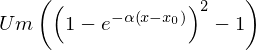

In [4]:
U = Um*((1-sp.exp(-alpha*(x-x0)))**2-1)
U

Next, Let's take the derivatite of $U(x)$ with respect to $x$: $U'(x)$. 

Remember the force is $-U'(x)$ so the point in space where $U'(x)=0$ is the equilibrium position.

Python expression for Force:
Force is: -2*Um*alpha*(1 - exp(-alpha*(x - x_0)))*exp(-alpha*(x - x_0))
Latex: 2 Um \alpha \left(1 - e^{- \alpha \left(x - x_{0}\right)}\right) e^{- \alpha \left(x - x_{0}\right)}
Pretty math


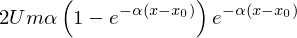

In [5]:
Up=U.diff(x)
print("Python expression for Force:")
print("Force is:",-Up)
print("Latex:", sp.latex(Up))
print("Pretty math")
Up

Next we can solve for the value of x where $\frac{dU}{dx} = 0$.

In [6]:
sp.solve(Up,x)

Aha! So the function has a minimum at $x=x_0$. Now take the *second* derivative of $U(x)$ with respect to $x$: $U''(x)$

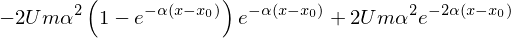

In [7]:
Upp=Up.diff(x)
Upp

OK, we can use the `subs` method to evalute $U''(x)$ where $x=x_0$:

In [8]:
Upp.subs(x,x0)

So, we see now that:

$$\frac{d^2U}{dx^2}\bigg|_{x_0} = 2 U_m \alpha^2$$

so we can connect the parameters of the Morse Potential to the Taylor Series coefficients near the minimum of the Potential.

Project 3
===========

See the podcast! But basically the project is to use the experimental data, the analytical approximation (Taylor Series) to the Morse Potential and the Heun Method to:

* Verify/show that the experimental data is consistent with the Morse Potential model.

* Use the Heun Method to compute the period of small oscillations about the equilibrium position and compare that to the experimental data *and* the Taylor Series result.

$U_m$ = 7.37 eV

$x_0$ = 1.2 A

$\alpha = 2.287\ A^{-1}$

$f$ = $5.19\times 10^{13}$ Hz

IMPORTANT NOTES
---------------

1) Without careful attention to keeping the namespaces separate it's not really practical to use sympy and pylab at the same time in the same notebook. If you're interested in this, I have a notebook that illustrates how this can be done, but I don't want overload you with too many new concepts in this one lesson. If you're already confused just take my advice and don't mix them. Doing this is easy: Create *one* notebook for sympy. Take the *result* of that notebook and use it to produce the python expression you need for the numerial algorithm. Then create a *second* notebook and simply *paste* python expression produced by the first notebook in the evaluation of the force for the second notebook. Simple.

2) This project is meant to add two tools to your toolbox 1: sympy, 2: Talor Series expansion. Both of these are really just analytical tools that work with algebra and calculus. We're going to use these tools to understand and approximate the low amplitude behavior system interacting under the Morse Potential. Then we're going to *check* our understanding and approximation by calculating the (arbitrary amplitude) behavior of a system interacting under the Morse Potential numericaly and evaluating the frequency at various amplitudes. So:

    a) Use sympy/Taylor series to estimate the low-amplitude frequency of the system
    b) Use sympy to get a python expression for the Force of interaction
    c) Use a numerical method (e.g., Heun Algorithm) to compute the time evolution (frequency) of the system
    d) Compare the results of (c) and (a)
    e) Once you've validated the code in step "d" experiment with increasing the amplitude of motion. 
    f) Describe how the period and trajectory of the particle changes.

Please ask if you have questions!
